# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [49]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares (takster)
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [50]:
import pandas as pd
import pyarrow.parquet as pq
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [51]:
df_yellow.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   
3             2          8.0    0.5      0.5        0.00           0.0   
4             1         23.5    0.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         21.95                   2.5          0.0  
1                    0.3         13.30                   0.0          0.0  
2                    0.3         10.56                   0.0          0.0  
3                    0.3         11.80                   2.5          0.0  
4                    0.3         30.30                   2.5          0.0

In [52]:
df_green.head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          3.5   0.50      0.5        0.00           0.0      None   
1          9.5   0.50      0.5        0.00           0.0      None   
2         14.5   3.25      0.5        4.60           0.0      None   
3          8.0   0.50      0.5        0.00           0.0      None   
4         22.0   0.50      0.5        5.21           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          4.80           2.0        1.0   
1                    0.3         10.80           2.0        1.0   
2                    0.3         23.15           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                    0.3         31.26           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  2.75  
3                  0.00  
4                  2.75

In [53]:
df_yellow = df_yellow[df_yellow.passenger_count > 0]
df_yellow = df_yellow[df_yellow.trip_distance > 0]
df_yellow = df_yellow[df_yellow.tip_amount > 0]
df_yellow = df_yellow[df_yellow.total_amount > 0]
df_yellow = df_yellow[df_yellow.fare_amount > 0]
df_yellow = df_yellow[df_yellow.payment_type > 0.0]


df_green = df_green[df_green.passenger_count > 0]
df_green = df_green[df_green.trip_distance > 0]
df_green = df_green[df_green.tip_amount > 0]
df_green = df_green[df_green.total_amount > 0]
df_green = df_green[df_green.fare_amount > 0]
df_green = df_green[df_green.payment_type > 0.0]

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

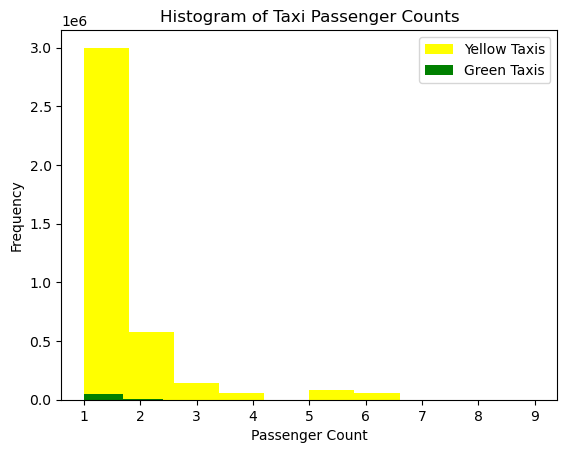

In [54]:
import matplotlib.pyplot as plt

# Plotting yellow taxi passenger counts
plt.hist(df_yellow.passenger_count, bins=10, color='yellow', label='Yellow Taxis')

# Plotting green taxi passenger counts
plt.hist(df_green.passenger_count, bins=10, color='green', label='Green Taxis')

# Adding labels and a legend
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Taxi Passenger Counts')
plt.legend()

# Displaying the histogram
plt.show()

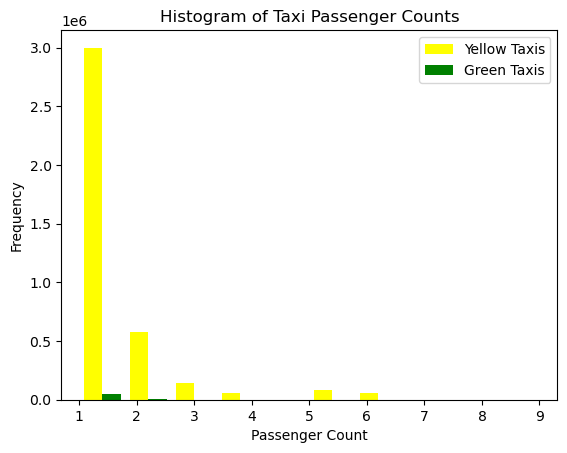

In [55]:
import matplotlib.pyplot as plt

# Definér data og antallet af bins
yellow_data = df_yellow.passenger_count
green_data = df_green.passenger_count
bins = 10

# Plotting histogram med søjler ved siden af hinanden
plt.hist([yellow_data, green_data], bins=bins, color=['yellow', 'green'], label=['Yellow Taxis', 'Green Taxis'])

# Tilføj labels og en legende
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Taxi Passenger Counts')
plt.legend()

# Vis histogrammet
plt.show()

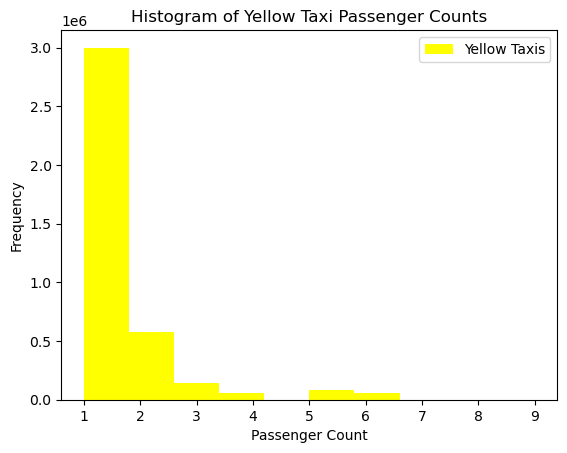

In [56]:
import matplotlib.pyplot as plt

# Plotting yellow taxi passenger counts
plt.hist(df_yellow.passenger_count, bins=10, color='yellow', label='Yellow Taxis')

# Adding labels and a legend
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Yellow Taxi Passenger Counts')
plt.legend()

# Displaying the histogram
plt.show()

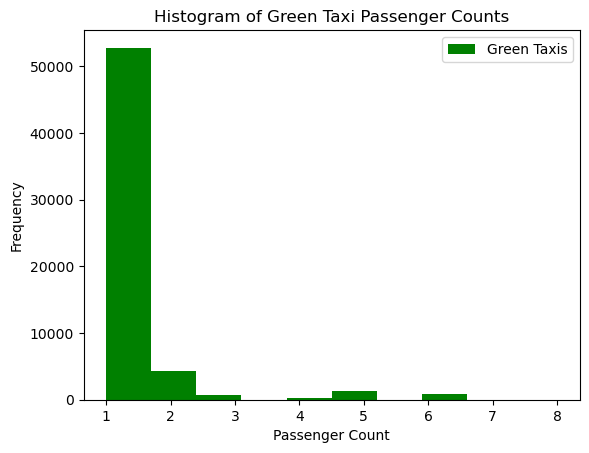

In [57]:
# Plotting green taxi passenger counts
plt.hist(df_green.passenger_count, bins=10, color='green', label='Green Taxis')

# Adding labels and a legend
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Histogram of Green Taxi Passenger Counts')
plt.legend()

# Displaying the histogram
plt.show()


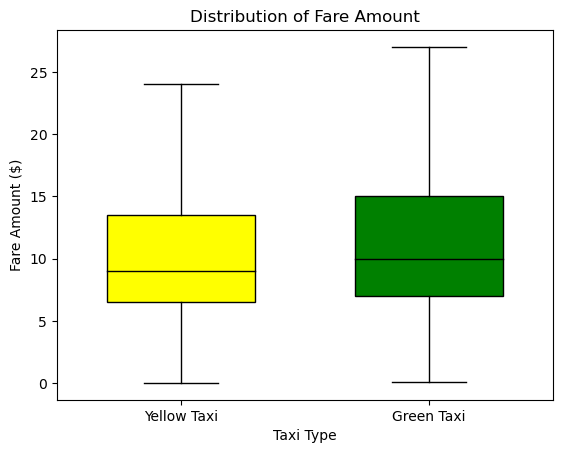

In [58]:
import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow['fare_amount'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green['fare_amount'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Fare Amount ($)')
plt.title('Distribution of Fare Amount')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()

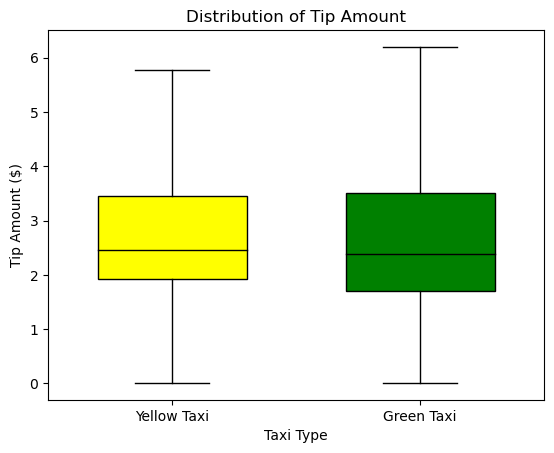

In [59]:


import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow['tip_amount'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green['tip_amount'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Tip Amount ($)')
plt.title('Distribution of Tip Amount')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()



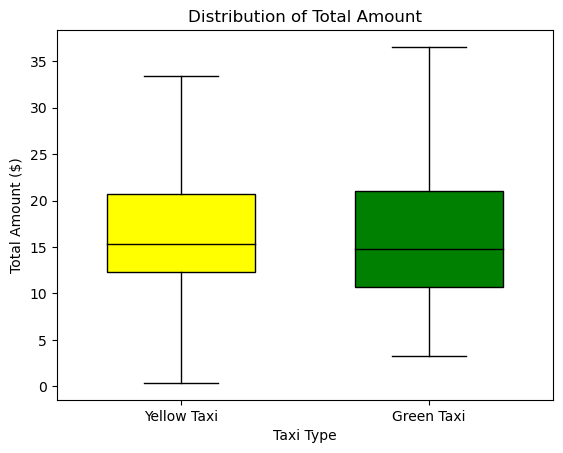

In [60]:


import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow['total_amount'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green['total_amount'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Total Amount ($)')
plt.title('Distribution of Total Amount')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()

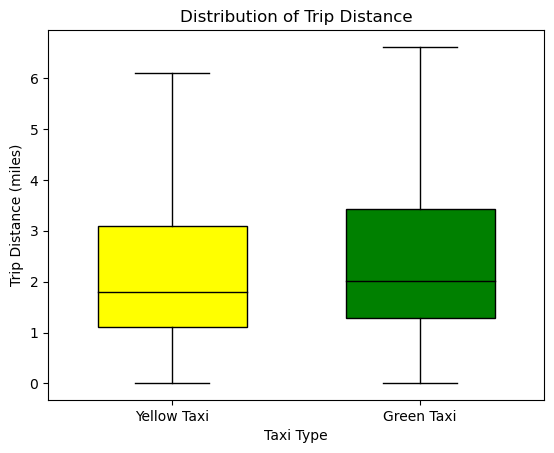

In [61]:

import matplotlib.pyplot as plt

# Plotting boxplot for yellow taxis
plt.boxplot(df_yellow['trip_distance'], positions=[1], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='yellow', color='black'), medianprops=dict(color='black'))

# Plotting boxplot for green taxis
plt.boxplot(df_green['trip_distance'], positions=[2], sym='', widths=0.6, patch_artist=True, boxprops=dict(facecolor='green', color='black'), medianprops=dict(color='black'))

plt.xlabel('Taxi Type')
plt.ylabel('Trip Distance (miles)')
plt.title('Distribution of Trip Distance')
plt.xticks([1, 2], ['Yellow Taxi', 'Green Taxi'])
plt.show()

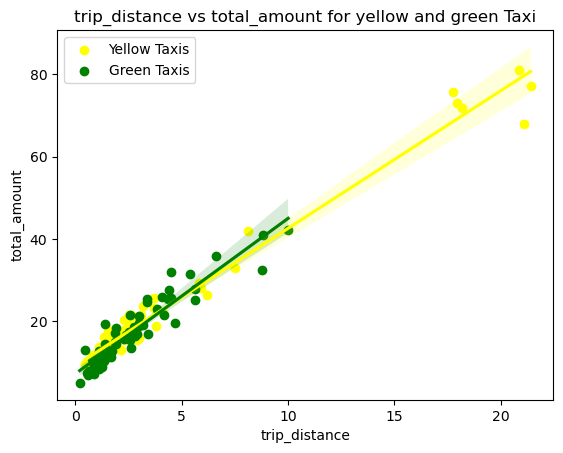

In [62]:
import matplotlib.pyplot as plt

from src.utils import create_scatterplot2

# Example usage
create_scatterplot2(
    df_yellow.sample(65), 
    df_green.sample(65), 
    x_col='trip_distance', 
    y_col='total_amount', 
    title='trip_distance vs total_amount for yellow and green Taxi', 
    xlabel='trip_distance',
    ylabel='total_amount',
)

In [63]:
# Converting colons to datetime-format for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])

# Calculating trip duration by subtracting pickup-time and dropoff-time
# Beregn trip duration ved at trække pickup-tidspunktet fra dropoff-tidspunktet
df_green['trip_duration'] = (df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']).dt.total_seconds()

# Converting colons to datetime-format for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])

# Beregn trip duration ved at trække pickup-tidspunktet fra dropoff-tidspunktet
df_yellow['trip_duration'] = (df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']).dt.total_seconds()

In [64]:
df_green_sample = df_green.sample(90)
df_green_sample=df_green_sample[df_green_sample.trip_duration < 500]
df_green_sample=df_green_sample[df_green_sample.trip_distance < 10]


df_yellow_sample = df_yellow.sample(90)
df_yellow_sample=df_yellow_sample[df_yellow_sample.trip_duration < 500]
df_yellow_sample=df_yellow_sample[df_yellow_sample.trip_distance < 10]


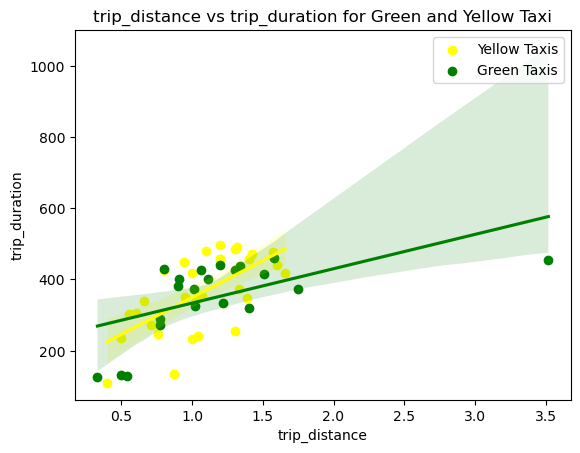

In [65]:

from src.utils import create_scatterplot2


create_scatterplot2(
    df_yellow_sample,
    df_green_sample,
    x_col='trip_distance',
    y_col='trip_duration',
    title='trip_distance vs trip_duration for Green and Yellow Taxi',
    xlabel='trip_distance',
    ylabel='trip_duration',
)

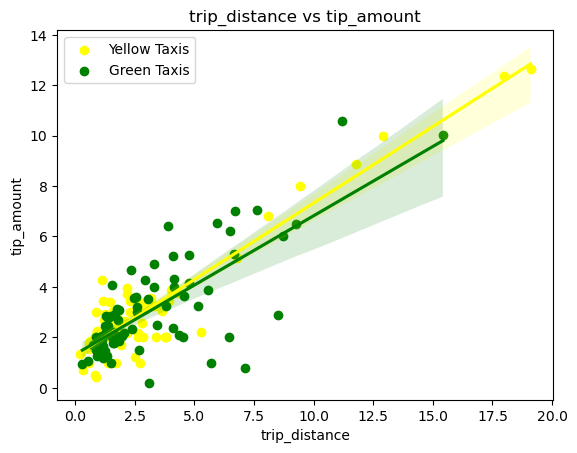

In [66]:
#Scatterplot for green and yellow Taxi's
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import create_scatterplot2

create_scatterplot2(
    df_yellow.sample(80),
    df_green.sample(80),
    x_col='trip_distance',
    y_col='tip_amount',
    title='trip_distance vs tip_amount',
    xlabel='trip_distance',
    ylabel='tip_amount',
)

In [67]:
#df_green = df_green.sample(100)
#df_green = df_green[df_green.tip_amount>=0]
#df_green =df_green[df_green.payment_type>=0] #filtrer fordi one payment type was nan, empty. So we removed it. 

#df_yellow = df_yellow.sample(100)
#df_yellow = df_yellow[df_yellow.tip_amount>=0]
#df_yellow =df_yellow[df_yellow.payment_type>=0] #filtrer fordi one payment type was nan, empty. So we removed it. 

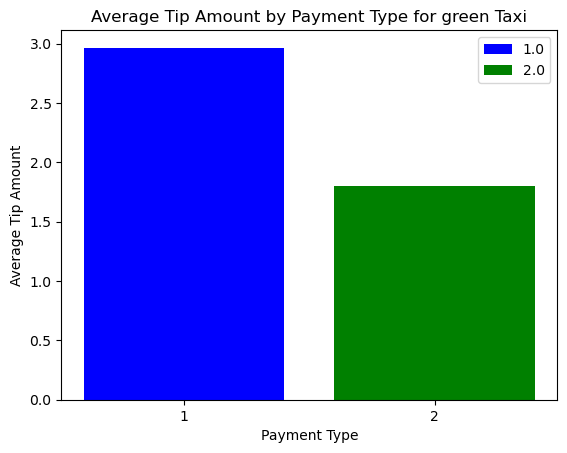

In [68]:

import matplotlib.pyplot as plt

# Grupper data efter payment type og beregn gennemsnittet af tip amount for hver gruppe
grouped_data = df_green.groupby('payment_type')['tip_amount'].mean()

# Opret en liste over farver/mønstre for hver betalingstype
colors = ['b', 'g', 'c', 'r', 'p']

# Plot gennemsnittet af tip amount for hver payment type
fig, ax = plt.subplots()
for i, payment_type in enumerate(grouped_data.index):
    tip_amount = grouped_data[payment_type]
    if tip_amount == 0:
        ax.bar(payment_type, tip_amount, color='purple')
    else:
        ax.bar(payment_type, tip_amount, color=colors[i % len(colors)])

ax.set_xlabel('Payment Type')
ax.set_ylabel('Average Tip Amount')
ax.set_title('Average Tip Amount by Payment Type for green Taxi')
ax.set_xticks(grouped_data.index)
ax.legend(grouped_data.index)

plt.show()



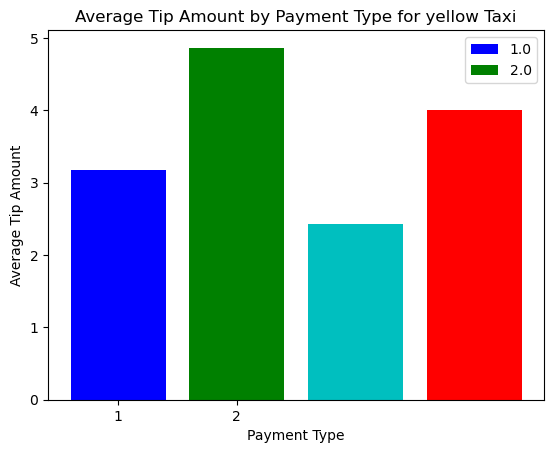

In [69]:
# Grupper data efter payment type og beregn gennemsnittet af tip amount for hver gruppe
grouped_data1 = df_yellow.groupby('payment_type')['tip_amount'].mean()

# Opret en liste over farver/mønstre for hver betalingstype
colors = ['b', 'g', 'c', 'r', 'p']

# Plot gennemsnittet af tip amount for hver payment type
fig, ax = plt.subplots()
for i, payment_type in enumerate(grouped_data1.index):
    tip_amount = grouped_data1[payment_type]
    if tip_amount == 0:
        ax.bar(payment_type, tip_amount, color='purple')
    else:
        ax.bar(payment_type, tip_amount, color=colors[i % len(colors)])

ax.set_xlabel('Payment Type')
ax.set_ylabel('Average Tip Amount')
ax.set_title('Average Tip Amount by Payment Type for yellow Taxi')
ax.set_xticks(grouped_data.index)
ax.legend(grouped_data.index)

plt.show()



In [70]:
print(df_green['payment_type'].value_counts())

1.0    60264
2.0        1
Name: payment_type, dtype: int64


In [71]:
print(df_yellow['payment_type'].value_counts())

1    3907235
2         40
3          5
4          1
Name: payment_type, dtype: int64


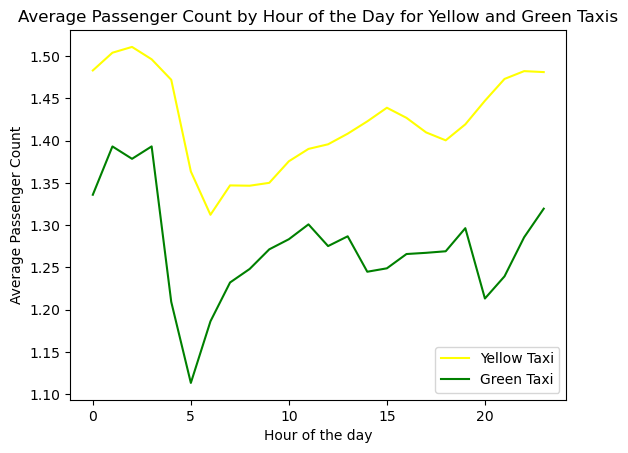

In [72]:
#Passenger counts 
#1. Creating Line plot that displays passenger count by hour of the day

# Calculating trip duration for yellow taxis
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['tpep_dropoff_datetime'] = pd.to_datetime(df_yellow['tpep_dropoff_datetime'])
df_yellow['trip_duration'] = df_yellow['tpep_dropoff_datetime'] - df_yellow['tpep_pickup_datetime']
df_yellow['trip_duration_minutes'] = df_yellow['trip_duration'].dt.total_seconds() / 60
grouped_data_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

# Calculating trip duration for green taxis
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['lpep_dropoff_datetime'] = pd.to_datetime(df_green['lpep_dropoff_datetime'])
df_green['trip_duration'] = df_green['lpep_dropoff_datetime'] - df_green['lpep_pickup_datetime']
df_green['trip_duration_minutes'] = df_green['trip_duration'].dt.total_seconds() / 60
grouped_data_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['passenger_count'].mean()

#Plotting the average passenger counts for both yellow and green taxis on the same graph
plt.plot(grouped_data_yellow.index, grouped_data_yellow.values, color='yellow', label='Yellow Taxi')
plt.plot(grouped_data_green.index, grouped_data_green.values, color='green', label='Green Taxi')
plt.xlabel('Hour of the day')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Hour of the Day for Yellow and Green Taxis')
plt.legend()
plt.show()



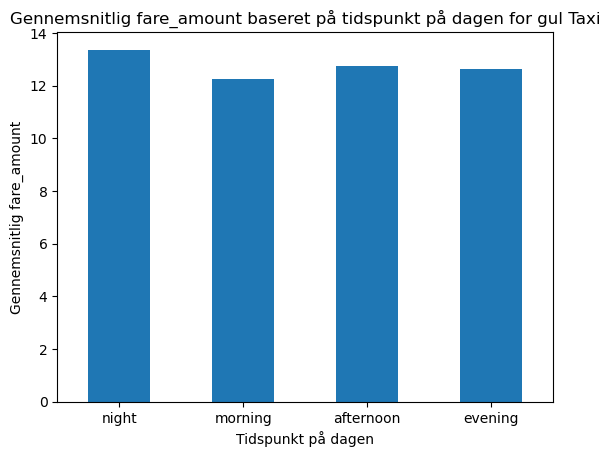

In [73]:
import matplotlib.pyplot as plt

# Konverter pick up_time til datetime-format
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Opret en ny kategori for tidspunkt på dagen (morgen, eftermiddag, aften, nat)
df_yellow['time_category'] = pd.cut(df_yellow['tpep_pickup_datetime'].dt.hour,
 bins=[0, 6, 12, 18, 24],
 labels=['night', 'morning', 'afternoon', 'evening'],
 right=False)

# Grupper data efter tidspunkt på dagen og beregn gennemsnitlig fare_amount
fare_by_time = df_yellow.groupby('time_category')['fare_amount'].mean()

# Lav en søjlediagram for at visualisere gennemsnitlig fare_amount baseret på tidspunkt på dagen
fare_by_time.plot(kind='bar', rot=0)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount baseret på tidspunkt på dagen for gul Taxi')
plt.show()

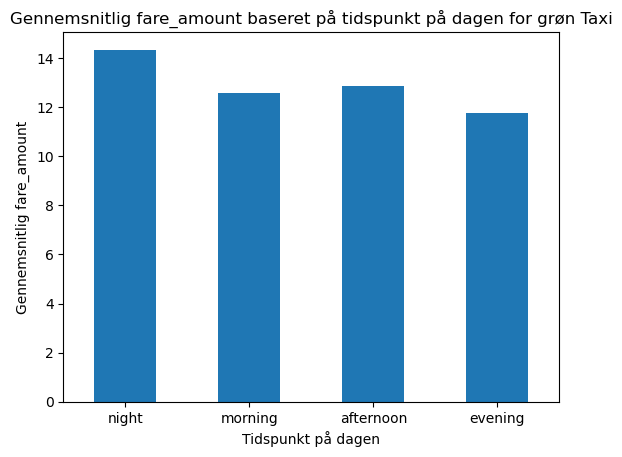

In [74]:
import matplotlib.pyplot as plt

# Konverter pick up_time til datetime-format
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Opret en ny kategori for tidspunkt på dagen (morgen, eftermiddag, aften, nat)
df_green['time_category'] = pd.cut(df_green['lpep_pickup_datetime'].dt.hour,
 bins=[0, 6, 12, 18, 24],
 labels=['night', 'morning', 'afternoon', 'evening'],
 right=False)

# Grupper data efter tidspunkt på dagen og beregn gennemsnitlig fare_amount
fare_by_time = df_green.groupby('time_category')['fare_amount'].mean()

# Lav en søjlediagram for at visualisere gennemsnitlig fare_amount baseret på tidspunkt på dagen
fare_by_time.plot(kind='bar', rot=0)
plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount baseret på tidspunkt på dagen for grøn Taxi')
plt.show()

In [75]:
print(df_yellow['payment_type'].value_counts())
df_yellow[df_yellow['payment_type'].notna()]
df_yellow =df_yellow[df_yellow.fare_amount>0]

1    3907235
2         40
3          5
4          1
Name: payment_type, dtype: int64


In [76]:
print(df_green['payment_type'].value_counts())
df_green[df_green['payment_type'].notna()]
df_green =df_green[df_green.fare_amount>0]

1.0    60264
2.0        1
Name: payment_type, dtype: int64


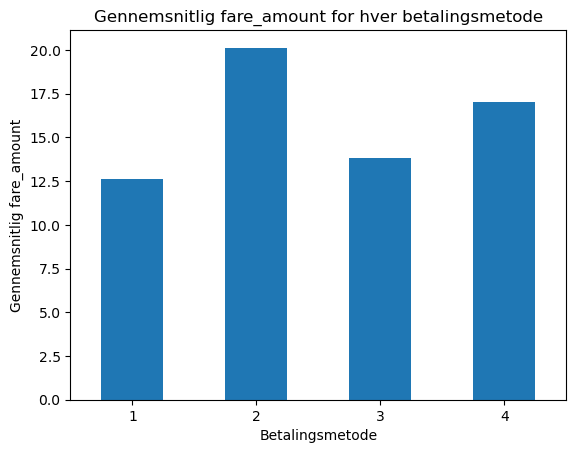

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Lav en søjlediagram for at visualisere fare_amount for hver betalingsmetode
df_yellow.groupby('payment_type')['fare_amount'].mean().plot(kind='bar', rot=0)

plt.xlabel('Betalingsmetode')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount for hver betalingsmetode')

plt.show()

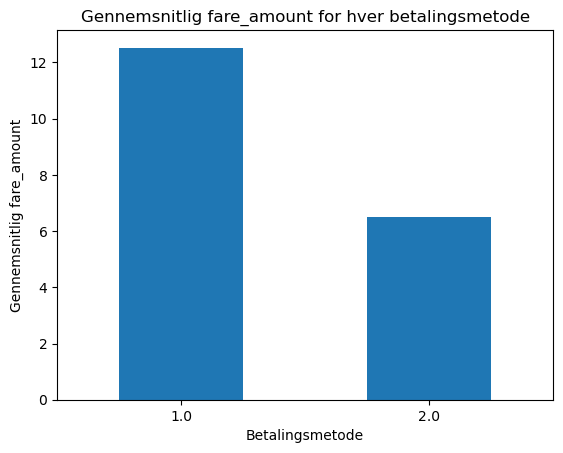

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Lav en søjlediagram for at visualisere fare_amount for hver betalingsmetode
df_green.groupby('payment_type')['fare_amount'].mean().plot(kind='bar', rot=0)

plt.xlabel('Betalingsmetode')
plt.ylabel('Gennemsnitlig fare_amount')
plt.title('Gennemsnitlig fare_amount for hver betalingsmetode')

plt.show()

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [79]:
df_zones.head(5)

Shape_Leng  Shape_Area                     zone  LocationID        borough  \
0    0.116357    0.000782           Newark Airport           1            EWR   
1    0.433470    0.004866              Jamaica Bay           2         Queens   
2    0.084341    0.000314  Allerton/Pelham Gardens           3          Bronx   
3    0.043567    0.000112            Alphabet City           4      Manhattan   
4    0.092146    0.000498            Arden Heights           5  Staten Island   

         lat        lng  
0  40.689516 -74.176786  
1  40.625724 -73.826126  
2  40.865888 -73.849479  
3  40.724152 -73.977023  
4  40.550340 -74.189930

In [80]:
#df_yellow_sample_3 = df_yellow[(df_yellow.tpep_pickup_datetime > '2022-02-01 10:00:00') & (df_yellow.tpep_pickup_datetime < '2022-02-28 12:00:00')]

#df_green_sample_4 = df_green[(df_green.lpep_pickup_datetime > '2022-02-01 10:00:00') & (df_green.lpep_pickup_datetime < '2022-02-28 12:00:00')]

In [81]:
#df_yellow_sample_3.shape

In [82]:
#df_green_sample_4.shape

In [83]:
#pd.merge(df_yellow_sample_3, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('yellow_taxi.csv', index=False)

#pd.merge(df_green_sample_4, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('green_taxi.csv', index=False)

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

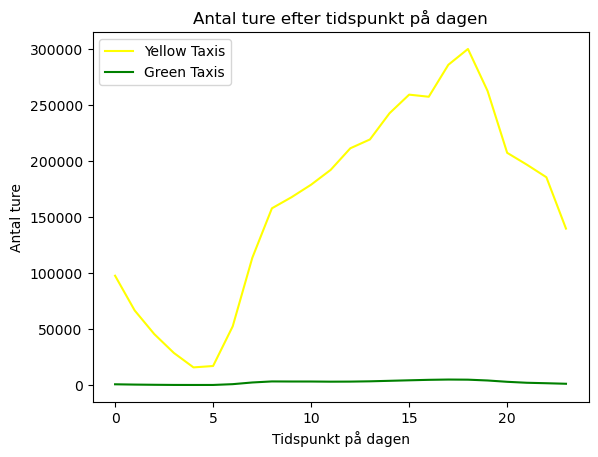

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data fra dine DataFrames (f.eks. df_yellow og df_green) og de relevante kolonner (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyser antallet af ture efter tidspunkt på dagen for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

# Analyser antallet af ture efter tidspunkt på dagen for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

# Lav et linjediagram for at vise antallet af ture efter tidspunkt på dagen for både yellow og green taxis
plt.plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter tidspunkt på dagen')
plt.legend()

plt.show()

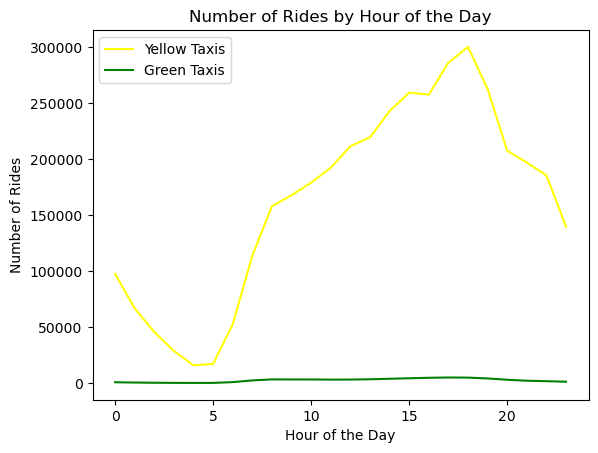

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

#Load data from your DataFrames (e.g., df_yellow and df_green) and the relevant columns (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

#Analyze the number of rides by hour of the day for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

#Analyze the number of rides by hour of the day for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

#Create a line plot to show the number of rides by hour of the day for both yellow and green taxis
plt.plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Hour of the Day')
plt.legend()

plt.show()

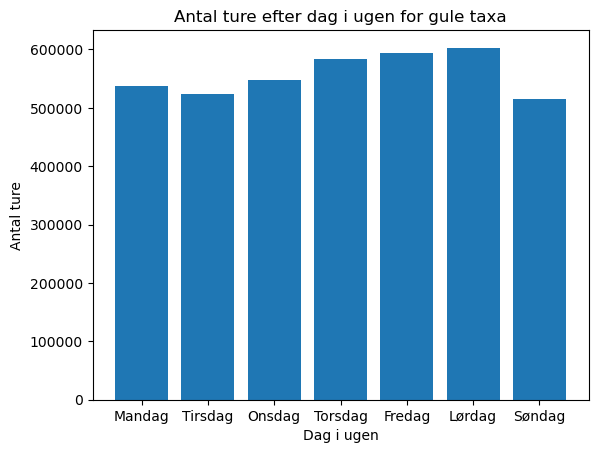

In [86]:
# Analyser antallet af ture efter dag i ugen
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
rides_by_day = df_yellow['day_of_week'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter dag i ugen
plt.bar(rides_by_day.index, rides_by_day.values)
plt.xlabel('Dag i ugen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter dag i ugen for gule taxa')
plt.xticks(range(7), ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag'])
plt.show()

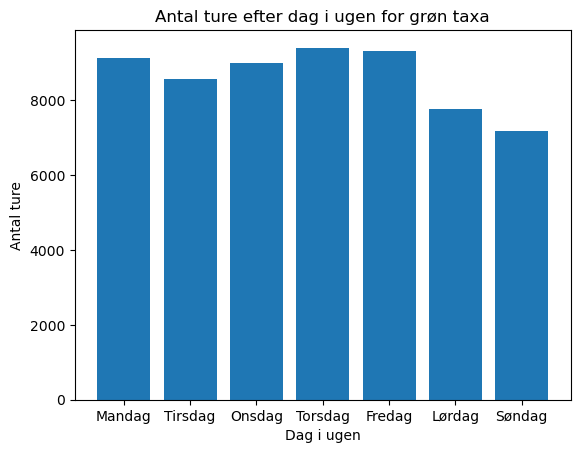

In [87]:
# Analyser antallet af ture efter dag i ugen
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
rides_by_day = df_green['day_of_week'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter dag i ugen
plt.bar(rides_by_day.index, rides_by_day.values)
plt.xlabel('Dag i ugen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter dag i ugen for grøn taxa')
plt.xticks(range(7), ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag'])
plt.show()

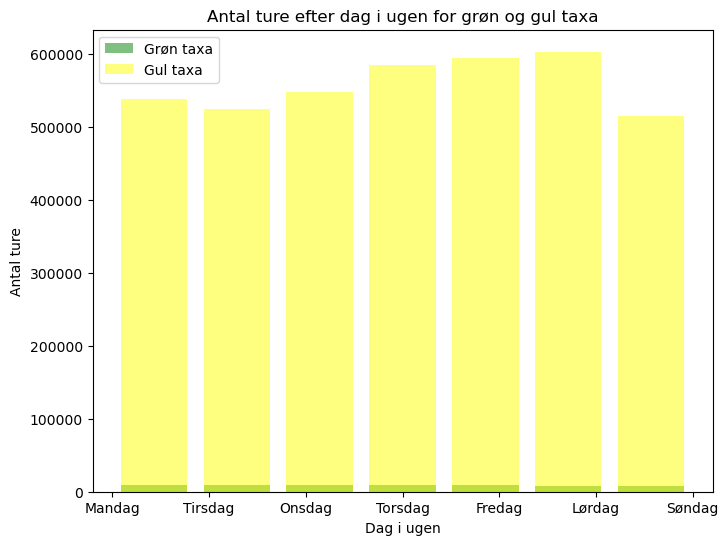

In [88]:
import matplotlib.pyplot as plt

# Analyser antallet af ture efter dag i ugen for grøn taxa
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
rides_by_day_green = df_green['day_of_week'].value_counts().sort_index()

# Analyser antallet af ture efter dag i ugen for gul taxa
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
rides_by_day_yellow = df_yellow['day_of_week'].value_counts().sort_index()

# Opret en figur og akse
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogrammet for grøn taxa
ax.hist(df_green['day_of_week'], bins=7, color='green', label='Grøn taxa', alpha=0.5, rwidth=0.8)

# Plot histogrammet for gul taxa med justering for at placere søjlerne ved siden af hinanden
ax.hist(df_yellow['day_of_week'], bins=7, color='yellow', label='Gul taxa', alpha=0.5, rwidth=0.8)

# Tilføj labels og titel
ax.set_xlabel('Dag i ugen')
ax.set_ylabel('Antal ture')
ax.set_title('Antal ture efter dag i ugen for grøn og gul taxa')
ax.set_xticks(range(7))
ax.set_xticklabels(['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag', 'Lørdag', 'Søndag'])

# Tilføj en legende
ax.legend()

# Vis plottet
plt.show()

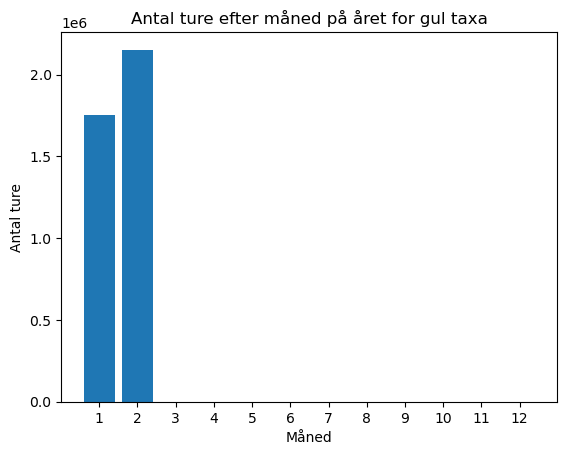

In [89]:
# Analyser antallet af ture efter måned på året
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month
rides_by_month = df_yellow['month'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter måned på året
plt.bar(rides_by_month.index, rides_by_month.values)
plt.xlabel('Måned')
plt.ylabel('Antal ture')
plt.title('Antal ture efter måned på året for gul taxa')
plt.xticks(range(1, 13))
plt.show()

In [90]:
# Analyser antallet af ture efter måned på året
#df_green['month'] = df_green['lpep_pickup_datetime'].dt.month
#rides_by_month1 = df_green['month'].value_counts().sort_index()

# Lav et søjlediagram for at vise antallet af ture efter måned på året
#plt.bar(rides_by_month1.index, rides_by_month.values)
#plt.xlabel('Måned')
#plt.ylabel('Antal ture')
#plt.title('Antal ture efter måned på året for grøn taxa')
#plt.xticks(range(1, 13))
#plt.show()

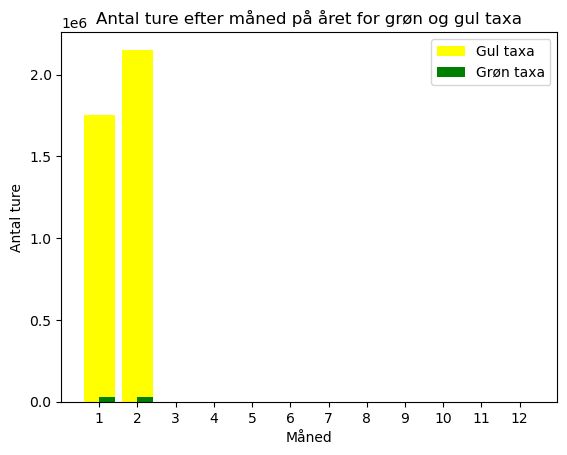

In [91]:
import matplotlib.pyplot as plt

# Analyser antallet af ture efter måned på året for gul taxa
rides_by_month_yellow = df_yellow['tpep_pickup_datetime'].dt.month.value_counts().sort_index()

# Analyser antallet af ture efter måned på året for grøn taxa
rides_by_month_green = df_green['lpep_pickup_datetime'].dt.month.value_counts().sort_index()

# Opret en figur og akse
fig, ax = plt.subplots()

# Plot søjlediagrammet for gul taxa
ax.bar(rides_by_month_yellow.index, rides_by_month_yellow.values, color='yellow', label='Gul taxa')

# Plot søjlediagrammet for grøn taxa ved at forskyde søjlerne lidt til højre
ax.bar(rides_by_month_green.index, rides_by_month_green.values, color='green', label='Grøn taxa', width=0.4, align='edge')

# Tilføj labels og titel
ax.set_xlabel('Måned')
ax.set_ylabel('Antal ture')
ax.set_title('Antal ture efter måned på året for grøn og gul taxa')
ax.set_xticks(range(1, 13))
ax.legend()

# Vis plottet
plt.show()

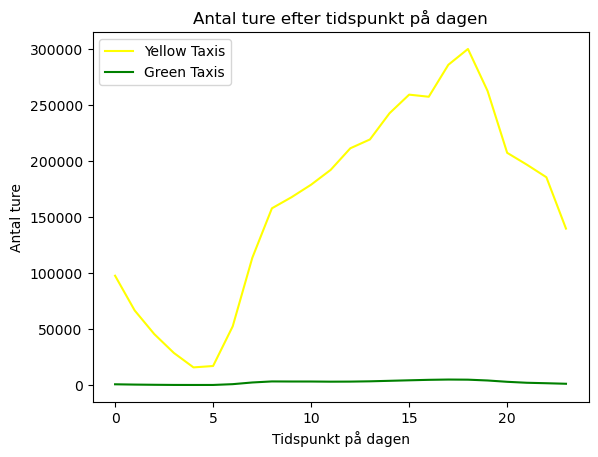

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Indlæs data fra dine DataFrame for yellow taxis (f.eks. df_yellow) og de relevante kolonner (pick up time, trip distance, fare)
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])

# Analyser antallet af ture efter tidspunkt på dagen for yellow taxis
df_yellow['hour_of_day'] = df_yellow['tpep_pickup_datetime'].dt.hour
rides_by_hour_yellow = df_yellow['hour_of_day'].value_counts().sort_index()

# Indlæs data fra dine DataFrame for green taxis (f.eks. df_green) og de relevante kolonner (pick up time, trip distance, fare)
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])

# Analyser antallet af ture efter tidspunkt på dagen for green taxis
df_green['hour_of_day'] = df_green['lpep_pickup_datetime'].dt.hour
rides_by_hour_green = df_green['hour_of_day'].value_counts().sort_index()

# Lav et linjediagram for at vise antallet af ture efter tidspunkt på dagen for både yellow og green taxis
plt.plot(rides_by_hour_yellow.index, rides_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(rides_by_hour_green.index, rides_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Antal ture')
plt.title('Antal ture efter tidspunkt på dagen')
plt.legend()

plt.show()

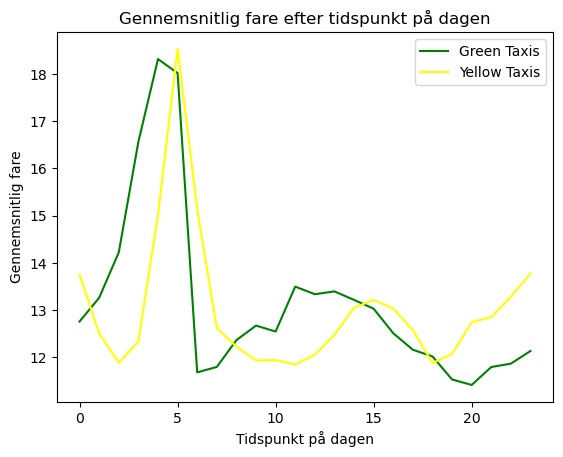

In [93]:
# Analyser forholdet mellem tidsmæssige mønstre og fare for green taxis
avg_fare_by_hour_green = df_green.groupby('hour_of_day')['fare_amount'].mean()

# Analyser forholdet mellem tidsmæssige mønstre og fare for yellow taxis
avg_fare_by_hour_yellow = df_yellow.groupby('hour_of_day')['fare_amount'].mean()

# Lav et linjediagram for at vise den gennemsnitlige fare efter tidspunkt på dagen for både green og yellow taxis
plt.plot(avg_fare_by_hour_green.index, avg_fare_by_hour_green.values, color='green', label='Green Taxis')
plt.plot(avg_fare_by_hour_yellow.index, avg_fare_by_hour_yellow.values, color='yellow', label='Yellow Taxis')

plt.xlabel('Tidspunkt på dagen')
plt.ylabel('Gennemsnitlig fare')
plt.title('Gennemsnitlig fare efter tidspunkt på dagen')
plt.legend()

plt.show()

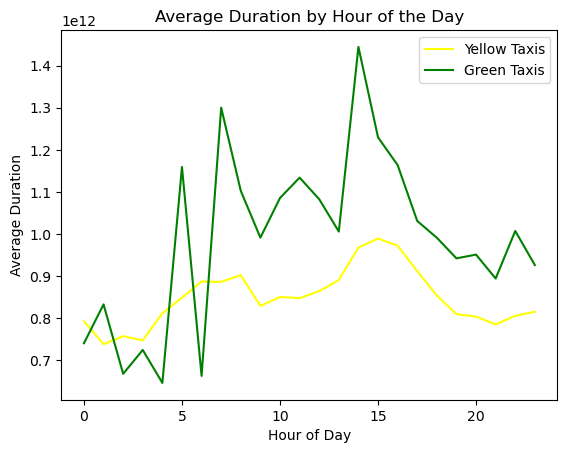

In [94]:
# Analyze the average duration by hour of the day for yellow taxis
avg_duration_by_hour_yellow = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Analyze the average duration by hour of the day for green taxis
avg_duration_by_hour_green = df_green.groupby(df_green['lpep_pickup_datetime'].dt.hour)['trip_duration'].mean()

# Create a line plot to visualize the average duration by hour of the day for both yellow and green taxis
plt.plot(avg_duration_by_hour_yellow.index, avg_duration_by_hour_yellow.values, color='yellow', label='Yellow Taxis')
plt.plot(avg_duration_by_hour_green.index, avg_duration_by_hour_green.values, color='green', label='Green Taxis')

plt.xlabel('Hour of Day')
plt.ylabel('Average Duration')
plt.title('Average Duration by Hour of the Day')
plt.legend()

plt.show()

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [95]:
import pandas as pd
import pyarrow.parquet as pq
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02','03','04','05','06','07','08','09','10','11','12']
year = '2022'

# Create empty lists to store the dataframes
df_yellow2_list = []
df_green2_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy2 = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg2 = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow2_list.append(dfy2)
    df_green2_list.append(dfg2)

# Concatenate the list of dataframes into a single dataframe
df_yellow2 = pd.concat(df_yellow2_list)
df_green2 = pd.concat(df_green2_list)

df_zones2 = load_data_from_google_drive(url=zones_url)

In [96]:
start_date = pd.to_datetime('2022-01-01 00:00:00')
end_date = pd.to_datetime('2022-12-25 23:59:00')
df_yellow2 = df_yellow2[(df_yellow2['tpep_pickup_datetime'] >= start_date) & (df_yellow2['tpep_pickup_datetime'] <= end_date)]


In [97]:
from prophet import Prophet
import pandas as pd
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()


df_yellow2['tpep_pickup_datetime'] = pd.to_datetime(df_yellow2['tpep_pickup_datetime'])
df_yellow2['number_of_rides'] = 1

# Opret en gruppebaseret dataframe ved at akkumulere antallet af ture pr. uge
df_ForecastedYellow = df_yellow2.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='W'))['number_of_rides'].sum().reset_index()
#df_ForecastYellow = df_yellow[['tpep_pickup_datetime', 'number_of_rides']].sample(100)
#pd.Grouper: pakke fra panda som giver mig en særlig gruppering. 
#freq at det skal være i uger
#sum summerer number of rides på hver uge
#reset.index, så df ikke får nyt index iforhold til de her datetimes. 

df_ForecastedYellow = df_ForecastedYellow.rename(columns={'tpep_pickup_datetime': 'ds', 'number_of_rides': 'y'})




In [98]:
df_ForecastedYellow

ds       y
0  2022-01-02  121862
1  2022-01-09  520249
2  2022-01-16  571903
3  2022-01-23  600094
4  2022-01-30  563893
5  2022-02-06  690827
6  2022-02-13  740999
7  2022-02-20  770415
8  2022-02-27  760811
9  2022-03-06  810104
10 2022-03-13  813143
11 2022-03-20  796894
12 2022-03-27  818890
13 2022-04-03  859093
14 2022-04-10  854635
15 2022-04-17  809070
16 2022-04-24  827321
17 2022-05-01  841146
18 2022-05-08  823083
19 2022-05-15  852295
20 2022-05-22  840759
21 2022-05-29  775311
22 2022-06-05  793597
23 2022-06-12  851649
24 2022-06-19  844234
25 2022-06-26  813949
26 2022-07-03  714746
27 2022-07-10  658617
28 2022-07-17  757145
29 2022-07-24  754854
30 2022-07-31  739868
31 2022-08-07  726112
32 2022-08-14  705672
33 2022-08-21  706855
34 2022-08-28  711559
35 2022-09-04  698209
36 2022-09-11  770077
37 2022-09-18  674429
38 2022-09-25  760013
39 2022-10-02  797426
40 2022-10-09  802605
41 2022-10-16  830699
42 2022-10-23  862279
43 2022-10-30  864415
44 2022-11-06  845424
45 2022-11-13  857624
46 2022-11-20  632521
47 2022-11-27  675024
48 2022-12-04  844961
49 2022-12-11  865687
50 2022-12-18  853127
51 2022-12-25  665519

01:06:43 - cmdstanpy - INFO - Chain [1] start processing
01:06:43 - cmdstanpy - INFO - Chain [1] done processing


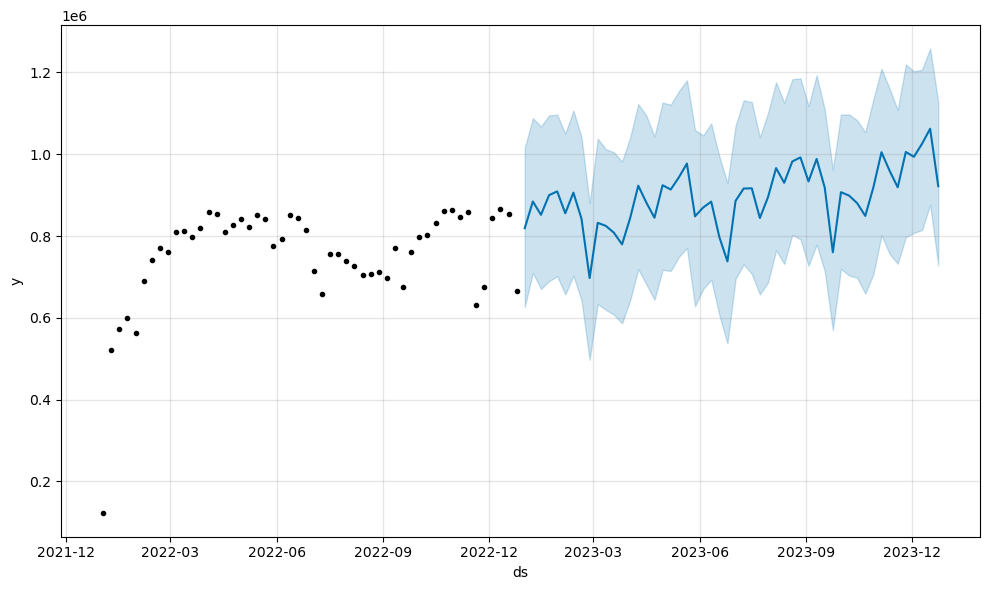

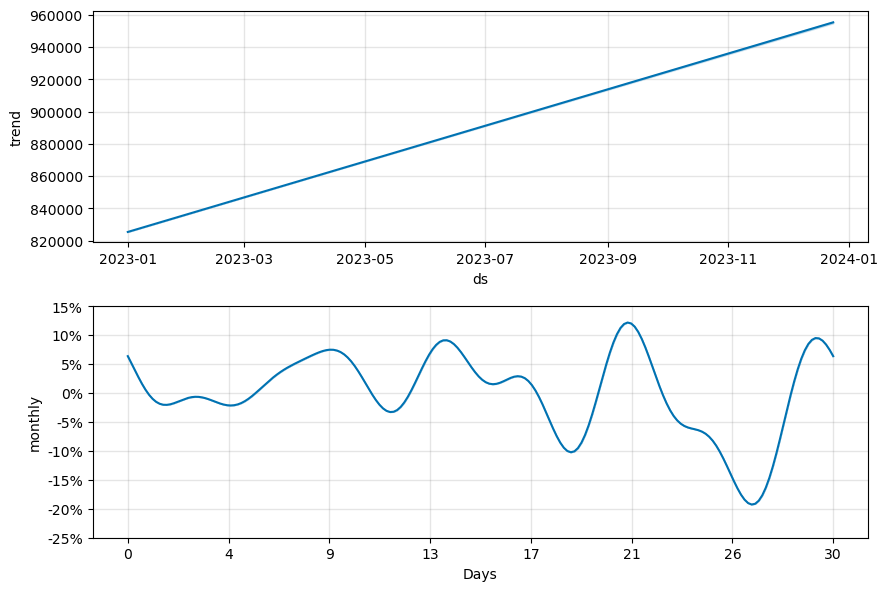

In [99]:
import matplotlib.pyplot as plt

model = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale=0.05, changepoint_range=0.9)
model.add_seasonality(name='monthly', period=30, fourier_order=8)  # Example of adding weekly seasonality

model.fit(df_ForecastedYellow)

future = model.make_future_dataframe(periods=52, freq='W',  include_history=False)    
# Definer antallet af fremtidige tidspunkter, du vil forudsige 


forecast = model.predict(future)

fig = model.plot(forecast,uncertainty=True)
plt.show()


fig_components = model.plot_components(forecast)

plt.show()

seasonality = model.predict_seasonal_components(future)
plt.show()


In [100]:
#model2 = Prophet()
#train_size = int(len(df_ForecastedYellow) * 0.8)  # 80% for training
#train_data = df_ForecastedYellow[:train_size]
#test_data = df_ForecastedYellow[train_size:]

# Train the model on the training data
##model2.fit(train_data)

# Make predictions on the testing data
#forecast2 = model2.predict(test_data)

# Compare the predicted values with the actual values in the testing data

01:06:45 - cmdstanpy - INFO - Chain [1] start processing
01:06:45 - cmdstanpy - INFO - Chain [1] done processing


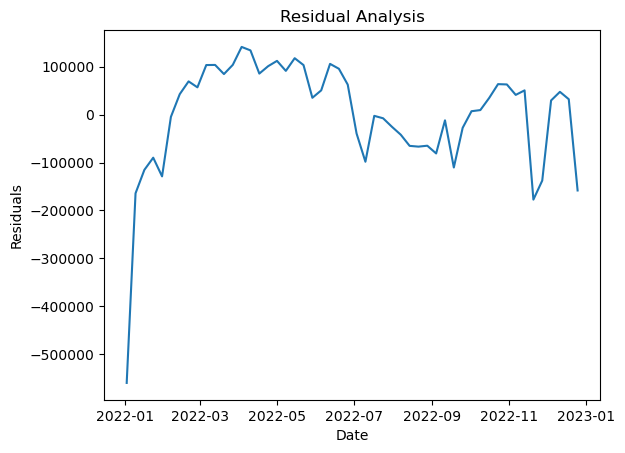

In [101]:
# Fit the Prophet model
model = Prophet()
model.fit(df_ForecastedYellow)

# Make predictions on the training data
forecast = model.predict(df_ForecastedYellow)

# Calculate residuals
actual_values = df_ForecastedYellow['y'].values
predicted_values = forecast['yhat'].values
residuals = actual_values - predicted_values

# Plot the residuals over time
plt.plot(df_ForecastedYellow['ds'], residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()



In [102]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the historical data into training and testing sets
train_df, test_df = train_test_split(df_ForecastedYellow, test_size=0.2, shuffle=False)

# Instantiate the Prophet model
model = Prophet(seasonality_mode='multiplicative')

# Fit the model on the training set
model.fit(train_df)

# Make predictions on the testing set
future = model.make_future_dataframe(periods=len(test_df), freq='W')
forecast = model.predict(future)
predictions = forecast['yhat'].tail(len(test_df)).values

# Get the actual values from the testing set
actual_values = test_df['y'].values

# Calculate evaluation metrics
mse = mean_squared_error(actual_values, predictions)
mae = mean_absolute_error(actual_values, predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

01:06:46 - cmdstanpy - INFO - Chain [1] start processing
01:06:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 9563455172.372402
Mean Absolute Error (MAE): 66813.42010921409


fikse det her:

This includes handling missing values, dealing with outliers, smoothing the data if necessary, and transforming variables if required (e.g., taking logarithms or applying differencing to stabilize variance).

Fine-tune the parameters of your chosen model to achieve better performance. This includes adjusting parameters such as seasonality settings, trend flexibility, and regularization parameters. Grid search or other optimization techniques can be employed to systematically search for the best parameter values.

changepoint_prior_scale: Recommended values range from 0.01 to 0.5. You can start with a value of 0.1 and adjust it based on the complexity of your data and the desired level of flexibility in capturing changepoints.

changepoint_range: The default value is 0.8, but you can experiment with values ranging from 0.5 to 0.9. Start with a value of 0.8 and adjust it based on the length of your time series and the frequency of changepoints you want to capture.

seasonality_mode: Choose between 'additive', 'multiplicative', or 'None' based on the characteristics of your data.
'additive' is recommended if the seasonal patterns have a constant magnitude throughout the time series.
'multiplicative' is recommended if the magnitude of seasonality varies with the overall trend.

seasonality_prior_scale: Recommended values range from 0.01 to 10. Start with a value of 10 and adjust it based on the strength and prominence of the seasonal patterns in your data.

The specific approach to handling missing values, outliers, smoothing, and transformations depends on your data and the characteristics of the problem you are trying to solve. Here are some general recommendations:

Missing Values:

Evaluate the extent of missing values in your dataset. If the missing values are minimal, removing the corresponding rows or imputing them using simple techniques like mean imputation or forward/backward filling may be sufficient.
If the missing values are more substantial, consider using more advanced imputation methods like interpolation or regression-based imputation. These methods take into account the relationships between variables to estimate missing values more accurately.
Outliers:

Identify and understand the nature of outliers in your dataset. Use visualization techniques and statistical measures to detect outliers.
Consider whether the outliers are genuine data points or if they are data entry errors or measurement anomalies. If they are genuine, it might be appropriate to keep them in the dataset or transform them using techniques like winsorization to limit their impact.
If the outliers are extreme or influential, removing them from the dataset might be necessary. However, be cautious about the potential loss of valuable information.
Data Smoothing:

Apply smoothing techniques if your data exhibits high variability or noise, making it difficult to identify underlying patterns.
Moving averages, exponential smoothing, or Savitzky-Golay filtering are common smoothing techniques. Experiment with different window sizes or smoothing parameters to find the optimal level of smoothing that preserves important patterns while reducing noise.
Variable Transformations:

Explore the relationships between variables and assess whether any transformations are needed to stabilize variance or linearize relationships.
Logarithmic, exponential, or power transformations can help handle non-linear relationships.
Square root, Box-Cox, or log transformations can address heteroscedasticity and achieve more constant variance.
It is important to carefully evaluate the impact of each step on your data and the performance of your forecasting model. Experimentation and validation are key to finding the most suitable techniques and parameter settings for your specific dataset.

Decide on the duration of your training and testing periods within the available data. For example, you might choose to use the first 9 months of 2022 as the training data and keep the remaining 3 months as the testing data.

Split your dataset based on the selected time period. Assign the data from January 2022 to September 2022 as the training set and the data from October 2022 to December 2022 as the testing set.

Fit your time-series forecasting model using the training set. Train the model on the data from January 2022 to September 2022 to capture patterns and relationships.

Use the trained model to make predictions on the testing set, which contains the data from October 2022 to December 2022. Compare the predicted values with the actual values in the testing set to evaluate the model's performance.

Calculate relevant evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or others to assess the accuracy and performance of the model on the testing set.

Remember that in this scenario, your model's predictions will be for the future time period (October to December 2022) that was not seen during training.

::::

Split your data into training and testing sets based on the desired time period. For example, use January 2022 to September 2022 as the training data and October 2022 to December 2022 as the testing data.

Initialize your Prophet model with the desired parameters, such as seasonality_mode, interval_width, changepoint_prior_scale, and changepoint_range.

Fit the Prophet model using the training data (January 2022 to September 2022).

Make predictions on the testing data (October 2022 to December 2022) using the trained model. Create a future dataframe (e.g., using make_future_dataframe) for the testing period.

Plot and visualize the forecasted values along with uncertainty using model.plot(forecast, uncertainty=True).

Plot the components of the forecasted values using model.plot_components(forecast).

Calculate the evaluation metrics (e.g., MSE, MAE) by comparing the predicted values with the actual values in the testing set.

Keep in mind that steps 5, 6, and 7 should be performed after you have split the data into training and testing sets to ensure that you are evaluating the model's performance on unseen data.

01:06:47 - cmdstanpy - INFO - Chain [1] start processing
01:06:47 - cmdstanpy - INFO - Chain [1] done processing


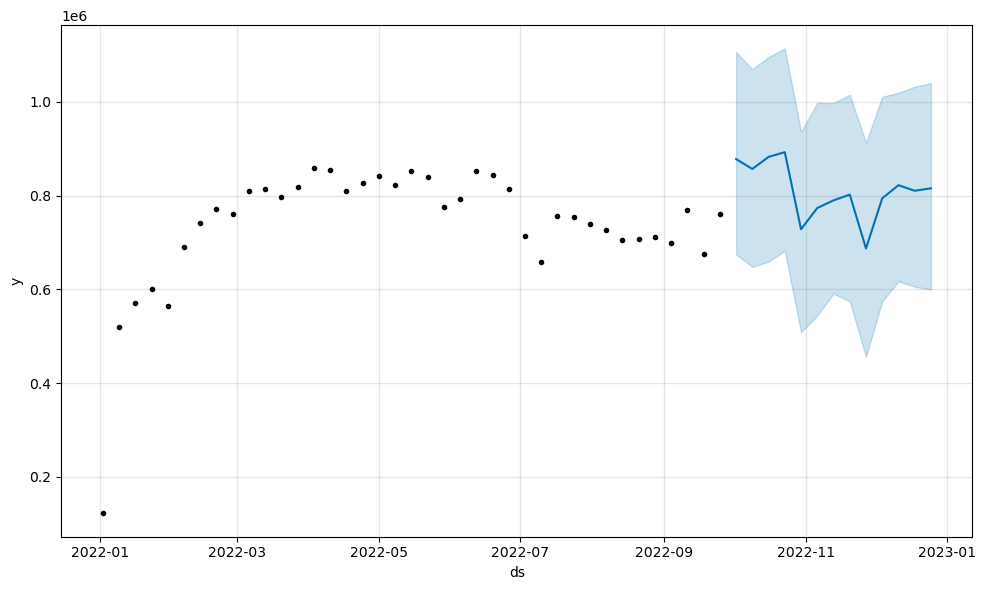

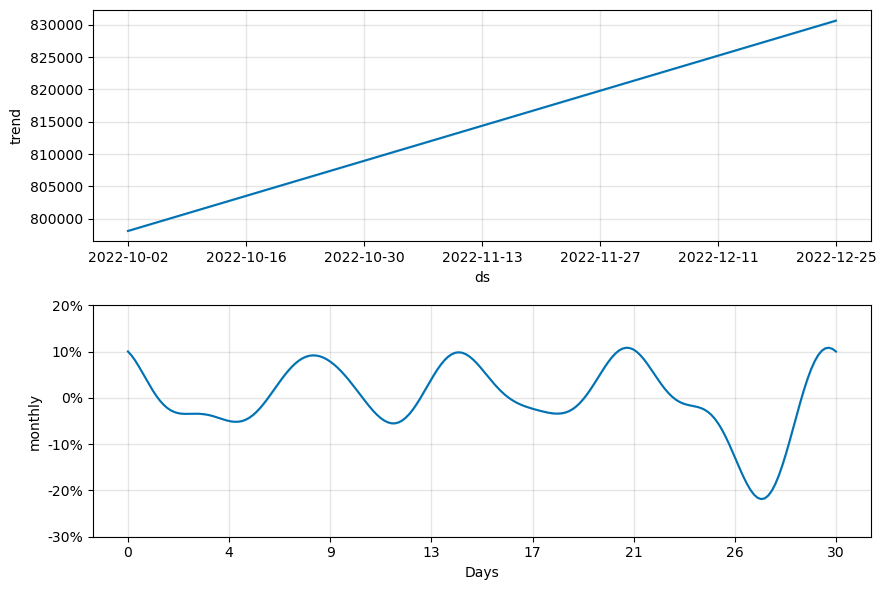

Mean Squared Error (MSE): nan
Mean Absolute Error (MAE): nan


In [103]:
import matplotlib.pyplot as plt
from prophet import Prophet

# Split the data into training and testing sets
train_data = df_ForecastedYellow[df_ForecastedYellow['ds'] < '2022-10-01']
test_data = df_ForecastedYellow[df_ForecastedYellow['ds'] >= '2022-10-01']

# Initialize the Prophet model
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale=0.05, changepoint_range=0.9)
model.add_seasonality(name='monthly', period=30, fourier_order=8)

# Fit the model using the training data
model.fit(train_data)

# Make predictions on the testing data
future = model.make_future_dataframe(periods=len(test_data), freq='W', include_history=False)
forecast = model.predict(future)

# Plot the forecasted values and uncertainty
fig = model.plot(forecast, uncertainty=True)
plt.show()

# Plot the components of the forecasted values
fig_components = model.plot_components(forecast)
plt.show()

# Calculate evaluation metrics
predicted_values = forecast['yhat'].tail(len(test_data))
actual_values = test_data['y']
mse = ((predicted_values - actual_values) ** 2).mean()
mae = (abs(predicted_values - actual_values)).mean()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE
mse = mean_squared_error(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 7624870195.7025795
Mean Absolute Error (MAE): 74003.0366036293


### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.